# Modelling - exploration

## 1. Imports and Reading data

In [450]:
from runner import io 

import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from scipy.stats import loguniform


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, PowerTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score,roc_auc_score, accuracy_score, r2_score, mean_squared_error


from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.neural_network import MLPClassifier

alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [317]:
df = io.load_table("model", "model_df")
# df = df.drop(columns=["city", "location_UF"])
df = df.drop(columns=["location_UF"])

In [318]:
# df = pd.get_dummies(df)
df = df.sort_values("year").reset_index(drop=True)#.drop(columns=["year"])
df

,year,nb_heads_cattle,area_ha_algodão_herbáceo_(em_caroço),area_ha_arroz_(em_casca),area_ha_café_(em_grão)_total,area_ha_cana-de-açúcar,area_ha_feijão_(em_grão),area_ha_laranja,area_ha_mandioca,area_ha_milho_(em_grão),...,quantidade_ton_feijão_(em_grão),quantidade_ton_laranja,quantidade_ton_mandioca,quantidade_ton_milho_(em_grão),quantidade_ton_soja_(em_grão),quantidade_ton_trigo_(em_grão),city,deforestation_ha,total_area_ha,natural_area_ha
0,1986,513300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,11280.0,6300.0,1512.0,0.0,0.0,Aquidauana,6760.381291,1.708776e+06,1.491534e+06
1,1986,189300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,480.0,2700.0,34870.0,3000.0,4305.0,0.0,Santo Antônio do Leverger,4029.539408,9.469102e+05,8.532590e+05
2,1986,232007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,770.0,2640.0,3080.0,1518.0,0.0,Poconé,4250.763297,1.715667e+06,1.613691e+06
3,1986,50428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,0.0,26100.0,6860.0,4884.0,0.0,Nossa Senhora do Livramento,3995.408788,5.537369e+05,4.864106e+05
4,1986,527235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3478.0,7200.0,10500.0,33915.0,3203.0,0.0,Cáceres,17858.408290,2.446372e+06,2.240521e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019,160921.0,0.0,180.0,0.0,10.0,380.0,0.0,100.0,2680.0,...,122.0,0.0,1000.0,8040.0,9600.0,0.0,Bodoquena,768.205690,2.591912e+05,1.436283e+05
530,2019,748882.0,0.0,0.0,0.0,15.0,120.0,2.0,190.0,20.0,...,144.0,20.0,2850.0,60.0,0.0,0.0,Aquidauana,5271.394814,1.708776e+06,1.242158e+06
531,2019,518687.0,0.0,20.0,0.0,250.0,20.0,0.0,140.0,300.0,...,12.0,0.0,1400.0,1512.0,26669.0,0.0,Poconé,1667.153113,1.715667e+06,1.497033e+06
532,2019,644655.0,0.0,0.0,0.0,3.0,550.0,0.0,8.0,1250.0,...,446.0,0.0,112.0,6170.0,11388.0,0.0,Porto Murtinho,5374.861069,1.749743e+06,1.126331e+06


## 2. Modelling

### 2.1 Tree based models

In [319]:
df.columns

Index(['year', 'nb_heads_cattle', 'area_ha_algodão_herbáceo_(em_caroço)',
       'area_ha_arroz_(em_casca)', 'area_ha_café_(em_grão)_total',
       'area_ha_cana-de-açúcar', 'area_ha_feijão_(em_grão)', 'area_ha_laranja',
       'area_ha_mandioca', 'area_ha_milho_(em_grão)', 'area_ha_soja_(em_grão)',
       'area_ha_trigo_(em_grão)',
       'quantidade_ton_algodão_herbáceo_(em_caroço)',
       'quantidade_ton_arroz_(em_casca)',
       'quantidade_ton_café_(em_grão)_total', 'quantidade_ton_cana-de-açúcar',
       'quantidade_ton_feijão_(em_grão)', 'quantidade_ton_laranja',
       'quantidade_ton_mandioca', 'quantidade_ton_milho_(em_grão)',
       'quantidade_ton_soja_(em_grão)', 'quantidade_ton_trigo_(em_grão)',
       'city', 'deforestation_ha', 'total_area_ha', 'natural_area_ha'],
      dtype='object')

In [320]:
df.columns

Index(['year', 'nb_heads_cattle', 'area_ha_algodão_herbáceo_(em_caroço)',
       'area_ha_arroz_(em_casca)', 'area_ha_café_(em_grão)_total',
       'area_ha_cana-de-açúcar', 'area_ha_feijão_(em_grão)', 'area_ha_laranja',
       'area_ha_mandioca', 'area_ha_milho_(em_grão)', 'area_ha_soja_(em_grão)',
       'area_ha_trigo_(em_grão)',
       'quantidade_ton_algodão_herbáceo_(em_caroço)',
       'quantidade_ton_arroz_(em_casca)',
       'quantidade_ton_café_(em_grão)_total', 'quantidade_ton_cana-de-açúcar',
       'quantidade_ton_feijão_(em_grão)', 'quantidade_ton_laranja',
       'quantidade_ton_mandioca', 'quantidade_ton_milho_(em_grão)',
       'quantidade_ton_soja_(em_grão)', 'quantidade_ton_trigo_(em_grão)',
       'city', 'deforestation_ha', 'total_area_ha', 'natural_area_ha'],
      dtype='object')

In [321]:
df

,year,nb_heads_cattle,area_ha_algodão_herbáceo_(em_caroço),area_ha_arroz_(em_casca),area_ha_café_(em_grão)_total,area_ha_cana-de-açúcar,area_ha_feijão_(em_grão),area_ha_laranja,area_ha_mandioca,area_ha_milho_(em_grão),...,quantidade_ton_feijão_(em_grão),quantidade_ton_laranja,quantidade_ton_mandioca,quantidade_ton_milho_(em_grão),quantidade_ton_soja_(em_grão),quantidade_ton_trigo_(em_grão),city,deforestation_ha,total_area_ha,natural_area_ha
0,1986,513300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,11280.0,6300.0,1512.0,0.0,0.0,Aquidauana,6760.381291,1.708776e+06,1.491534e+06
1,1986,189300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,480.0,2700.0,34870.0,3000.0,4305.0,0.0,Santo Antônio do Leverger,4029.539408,9.469102e+05,8.532590e+05
2,1986,232007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.0,770.0,2640.0,3080.0,1518.0,0.0,Poconé,4250.763297,1.715667e+06,1.613691e+06
3,1986,50428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,0.0,26100.0,6860.0,4884.0,0.0,Nossa Senhora do Livramento,3995.408788,5.537369e+05,4.864106e+05
4,1986,527235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3478.0,7200.0,10500.0,33915.0,3203.0,0.0,Cáceres,17858.408290,2.446372e+06,2.240521e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019,160921.0,0.0,180.0,0.0,10.0,380.0,0.0,100.0,2680.0,...,122.0,0.0,1000.0,8040.0,9600.0,0.0,Bodoquena,768.205690,2.591912e+05,1.436283e+05
530,2019,748882.0,0.0,0.0,0.0,15.0,120.0,2.0,190.0,20.0,...,144.0,20.0,2850.0,60.0,0.0,0.0,Aquidauana,5271.394814,1.708776e+06,1.242158e+06
531,2019,518687.0,0.0,20.0,0.0,250.0,20.0,0.0,140.0,300.0,...,12.0,0.0,1400.0,1512.0,26669.0,0.0,Poconé,1667.153113,1.715667e+06,1.497033e+06
532,2019,644655.0,0.0,0.0,0.0,3.0,550.0,0.0,8.0,1250.0,...,446.0,0.0,112.0,6170.0,11388.0,0.0,Porto Murtinho,5374.861069,1.749743e+06,1.126331e+06


In [322]:
grouped_df = df.groupby(["city"])

def lag_by_group(key, value_df):
    df = value_df.assign(group = key) # this pandas method returns a copy of the df, with group columns assigned the key value
    return (df.sort_values(by=["year"], ascending=True)
        .set_index(["year"])
        .shift(1)
        .rename(columns={"deforestation_ha": "deforestation_ha_lag_1"})
        [["city", "deforestation_ha_lag_1"]]
               ) # the parenthesis allow you to chain methods and avoid intermediate variable assignment

dflist = [lag_by_group(g, grouped_df.get_group(g)) for g in grouped_df.groups.keys()]
lagged_df_1 = pd.concat(dflist, axis=0).reset_index()


In [323]:
grouped_df = df.groupby(["city"])

def lag_by_group(key, value_df):
    df = value_df.assign(group = key) # this pandas method returns a copy of the df, with group columns assigned the key value
    return (df.sort_values(by=["year"], ascending=True)
        .set_index(["year"])
        .shift(2)
        .rename(columns={"deforestation_ha": "deforestation_ha_lag_2"})
        [["city", "deforestation_ha_lag_2"]]
               ) # the parenthesis allow you to chain methods and avoid intermediate variable assignment

dflist = [lag_by_group(g, grouped_df.get_group(g)) for g in grouped_df.groups.keys()]
lagged_df_2 = pd.concat(dflist, axis=0).reset_index()

In [324]:
grouped_df = df.groupby(["city"])

def lag_by_group(key, value_df):
    df = value_df.assign(group = key) # this pandas method returns a copy of the df, with group columns assigned the key value
    return (df.sort_values(by=["year"], ascending=True)
        .set_index(["year"])
        .shift(3)
        .rename(columns={"deforestation_ha": "deforestation_ha_lag_3"})
        [["city", "deforestation_ha_lag_3"]]
               ) # the parenthesis allow you to chain methods and avoid intermediate variable assignment

dflist = [lag_by_group(g, grouped_df.get_group(g)) for g in grouped_df.groups.keys()]
lagged_df_3 = pd.concat(dflist, axis=0).reset_index()

In [325]:
new_df = df.merge(lagged_df_1, on=["city", "year"], how="left").merge(lagged_df_2, on=["city", "year"], how="left").merge(lagged_df_3, on=["city", "year"], how="left")
new_df.tail()

,year,nb_heads_cattle,area_ha_algodão_herbáceo_(em_caroço),area_ha_arroz_(em_casca),area_ha_café_(em_grão)_total,area_ha_cana-de-açúcar,area_ha_feijão_(em_grão),area_ha_laranja,area_ha_mandioca,area_ha_milho_(em_grão),...,quantidade_ton_milho_(em_grão),quantidade_ton_soja_(em_grão),quantidade_ton_trigo_(em_grão),city,deforestation_ha,total_area_ha,natural_area_ha,deforestation_ha_lag_1,deforestation_ha_lag_2,deforestation_ha_lag_3
529,2019,160921.0,0.0,180.0,0.0,10.0,380.0,0.0,100.0,2680.0,...,8040.0,9600.0,0.0,Bodoquena,768.205690,2.591912e+05,1.436283e+05,700.470175,1033.625373,909.789930
530,2019,748882.0,0.0,0.0,0.0,15.0,120.0,2.0,190.0,20.0,...,60.0,0.0,0.0,Aquidauana,5271.394814,1.708776e+06,1.242158e+06,4217.975946,14213.983949,8495.758625
531,2019,518687.0,0.0,20.0,0.0,250.0,20.0,0.0,140.0,300.0,...,1512.0,26669.0,0.0,Poconé,1667.153113,1.715667e+06,1.497033e+06,3567.889409,3852.025492,4125.861237
532,2019,644655.0,0.0,0.0,0.0,3.0,550.0,0.0,8.0,1250.0,...,6170.0,11388.0,0.0,Porto Murtinho,5374.861069,1.749743e+06,1.126331e+06,3839.099412,7870.906661,8667.792767
533,2019,524842.0,6450.0,0.0,0.0,700.0,0.0,0.0,400.0,11000.0,...,66000.0,77490.0,0.0,Santo Antônio do Leverger,2400.736390,9.469102e+05,6.527272e+05,1584.053382,6078.372354,4512.371484


In [340]:
df = new_df.copy()
df.head()

,year,nb_heads_cattle,area_ha_algodão_herbáceo_(em_caroço),area_ha_arroz_(em_casca),area_ha_café_(em_grão)_total,area_ha_cana-de-açúcar,area_ha_feijão_(em_grão),area_ha_laranja,area_ha_mandioca,area_ha_milho_(em_grão),...,quantidade_ton_milho_(em_grão),quantidade_ton_soja_(em_grão),quantidade_ton_trigo_(em_grão),city,deforestation_ha,total_area_ha,natural_area_ha,deforestation_ha_lag_1,deforestation_ha_lag_2,deforestation_ha_lag_3
0,1986,513300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1512.0,0.0,0.0,Aquidauana,6760.381291,1.708776e+06,1.491534e+06,NaN,NaN,NaN
1,1986,189300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3000.0,4305.0,0.0,Santo Antônio do Leverger,4029.539408,9.469102e+05,8.532590e+05,NaN,NaN,NaN
2,1986,232007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3080.0,1518.0,0.0,Poconé,4250.763297,1.715667e+06,1.613691e+06,NaN,NaN,NaN
3,1986,50428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6860.0,4884.0,0.0,Nossa Senhora do Livramento,3995.408788,5.537369e+05,4.864106e+05,NaN,NaN,NaN
4,1986,527235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33915.0,3203.0,0.0,Cáceres,17858.408290,2.446372e+06,2.240521e+06,NaN,NaN,NaN


In [341]:
X = df.drop(columns=["deforestation_ha", "city", "year"])
y = df["deforestation_ha"]

In [342]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [343]:
cat_vars_complete = [i for i in X .columns if X.dtypes[i] == 'object']
num_vars_complete = [i for i in X.columns if X.dtypes[i] == 'float64' or X.dtypes[i] == 'int64']

ignore_variables = []
cat_vars = [element for element in cat_vars_complete if (element not in ignore_variables)]
specific_vars = []
num_vars = [element for element in num_vars_complete if (element != 'deforestation_ha' and element not in specific_vars + ignore_variables)]


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
#     ('polynomial_features',PolynomialFeatures(interaction_only=True)),
#     ('pca', PCA())
])

specific_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson')),
#     ('polynomial_features',PolynomialFeatures(interaction_only=False)),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
#     ('truncated_svd', TruncatedSVD())
#     ('sparse_pca', sparse_pca),
#     ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)
    ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars),
#         ('specific', specific_transformer, specific_vars),
    ])

rf_regressor = RandomForestRegressor()
xgb_regressor = XGBRegressor()

# param_dist_rf = {"max_depth": [None, 1],
#               "max_features": ['auto','sqrt'],
#               "min_samples_split": [2,3],
#               "min_samples_leaf": [3, 4],
#               "n_estimators": [400]}

# rf_random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist_rf)

model_rf = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('model', rf_regressor)
        ]
    )

model_xgb = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('model', xgb_regressor)
        ]
    )


In [344]:
X

,nb_heads_cattle,area_ha_algodão_herbáceo_(em_caroço),area_ha_arroz_(em_casca),area_ha_café_(em_grão)_total,area_ha_cana-de-açúcar,area_ha_feijão_(em_grão),area_ha_laranja,area_ha_mandioca,area_ha_milho_(em_grão),area_ha_soja_(em_grão),...,quantidade_ton_laranja,quantidade_ton_mandioca,quantidade_ton_milho_(em_grão),quantidade_ton_soja_(em_grão),quantidade_ton_trigo_(em_grão),total_area_ha,natural_area_ha,deforestation_ha_lag_1,deforestation_ha_lag_2,deforestation_ha_lag_3
0,513300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11280.0,6300.0,1512.0,0.0,0.0,1.708776e+06,1.491534e+06,NaN,NaN,NaN
1,189300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2700.0,34870.0,3000.0,4305.0,0.0,9.469102e+05,8.532590e+05,NaN,NaN,NaN
2,232007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,770.0,2640.0,3080.0,1518.0,0.0,1.715667e+06,1.613691e+06,NaN,NaN,NaN
3,50428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,26100.0,6860.0,4884.0,0.0,5.537369e+05,4.864106e+05,NaN,NaN,NaN
4,527235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7200.0,10500.0,33915.0,3203.0,0.0,2.446372e+06,2.240521e+06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,160921.0,0.0,180.0,0.0,10.0,380.0,0.0,100.0,2680.0,4150.0,...,0.0,1000.0,8040.0,9600.0,0.0,2.591912e+05,1.436283e+05,700.470175,1033.625373,909.789930
530,748882.0,0.0,0.0,0.0,15.0,120.0,2.0,190.0,20.0,0.0,...,20.0,2850.0,60.0,0.0,0.0,1.708776e+06,1.242158e+06,4217.975946,14213.983949,8495.758625
531,518687.0,0.0,20.0,0.0,250.0,20.0,0.0,140.0,300.0,8070.0,...,0.0,1400.0,1512.0,26669.0,0.0,1.715667e+06,1.497033e+06,3567.889409,3852.025492,4125.861237
532,644655.0,0.0,0.0,0.0,3.0,550.0,0.0,8.0,1250.0,3650.0,...,0.0,112.0,6170.0,11388.0,0.0,1.749743e+06,1.126331e+06,3839.099412,7870.906661,8667.792767


In [345]:
input_train = preprocessor.fit_transform(X)
input_train.shape

(534, 26)

In [346]:
len(X)/14

38.142857142857146

********************SPLIT 1********************
--------------------R.Forest--------------------
R2 Score: 69.04%
R2 Score (Train): 94.04%
Relative Error: 47.86%
--------------------XGBoost--------------------
R2 Score: 53.47%
Relative Error: 58.67%
********************SPLIT 2********************
--------------------R.Forest--------------------
R2 Score: 76.14%
R2 Score (Train): 96.73%
Relative Error: 47.15%
--------------------XGBoost--------------------
R2 Score: 71.63%
Relative Error: 51.41%
********************SPLIT 3********************
--------------------R.Forest--------------------
R2 Score: 89.27%
R2 Score (Train): 96.53%
Relative Error: 30.41%
--------------------XGBoost--------------------
R2 Score: 81.08%
Relative Error: 40.39%
********************SPLIT 4********************
--------------------R.Forest--------------------
R2 Score: 89.34%
R2 Score (Train): 97.49%
Relative Error: 28.44%
--------------------XGBoost--------------------
R2 Score: 85.09%
Relative Error: 33.63%


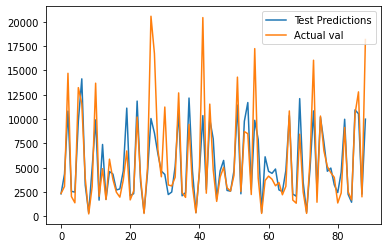

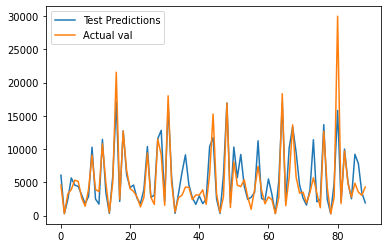

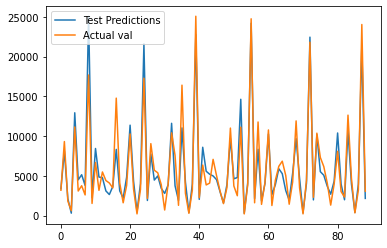

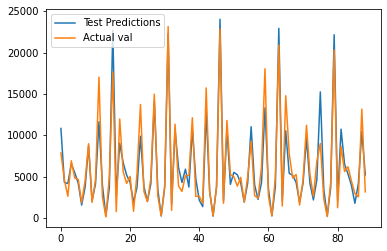

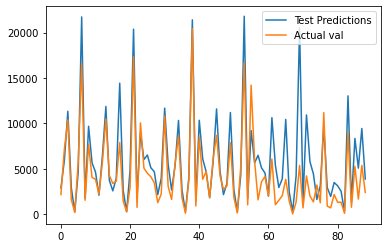

In [690]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
i = 0
# X = X.drop(columns=["year"])
for train_index, test_index in tscv.split(X):
    i += 1
    print("*"*20 + f"SPLIT {i}" + "*"*20)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    y_train_pred = model_rf.predict(X_train)
    # train_predictions = model_rf.predict(X_train)
    # train_results = pd.DataFrame({"Train Predictions": train_predictions, "Actual val": y_train.values})
    # train_results.plot()
    test_predictions = model_rf.predict(X_test)
    test_results = pd.DataFrame({"Test Predictions": test_predictions, "Actual val": y_test.values})
    test_results.plot()
    print("-"*20 + "R.Forest" + "-"*20)
    print(f"R2 Score: {r2_score(y_test, y_pred):.2%}")
    print(f"R2 Score: {mean_squared_error(y_test, y_pred):.2%}")
    print(f"R2 Score (Train): {r2_score(y_train, y_train_pred):.2%}")
    print(f"Relative Error: {mean_squared_error(y_test, y_pred, squared=False)/np.mean(y_test):.2%}")
    # model_xgb.fit(X_train, y_train)
    # y_pred = model_xgb.predict(X_test)
    # print("-"*20 + "XGBoost" + "-"*20)
    # print(f"R2 Score: {r2_score(y_test, y_pred):.2%}")
    # print(f"Relative Error: {mean_squared_error(y_test, y_pred, squared=False)/np.mean(y_test):.2%}")

In [348]:
train_predictions = model_rf.predict(X_train)
train_results = pd.DataFrame({"Train Predictions": train_predictions, "Actuals": y_train.values})

<AxesSubplot:>

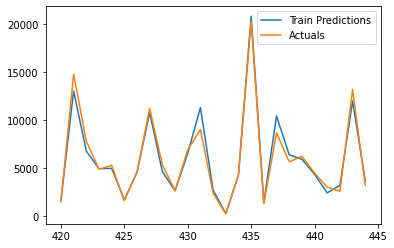

In [349]:
train_results[-25:].plot()

In [350]:
import shap
# Fits the explainer
explainer = shap.Explainer(model_rf.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 90it [00:35,  2.20it/s]                        


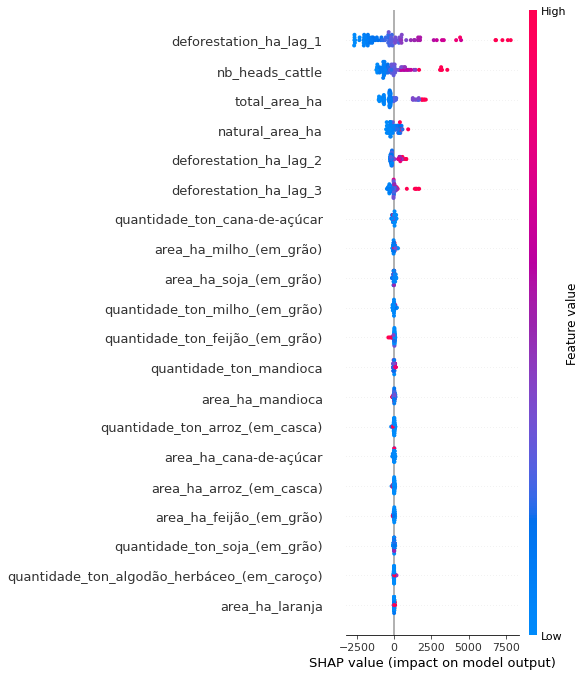

In [351]:
shap.summary_plot(shap_values)

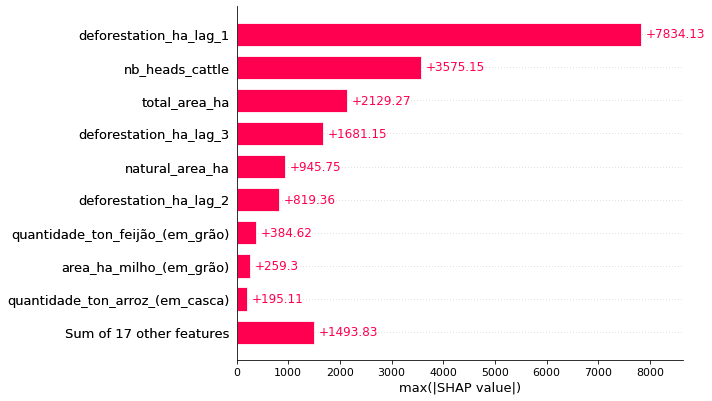

In [712]:
shap.plots.bar(shap_values.abs.max(0))

### 2.2 LSTM model

In [352]:
df = io.load_table("model", "model_df")

In [262]:
# trainX = []
# trainY = []

# for city in df.city.unique():
    
#     df_train = df.query("city == @city").drop(columns=["year", "city", "location_UF"]).reset_index(drop=True)
#     imputer = SimpleImputer()
#     scaler = StandardScaler()
#     df_train_imputer = imputer.fit_transform(df_train)
#     df_train_scaled = scaler.fit_transform(df_train_imputer)
#     df_train_scaled.shape
    

#     n_future = 1
#     n_past = 5

#     for i in range(n_past, len(df_train_scaled) - n_future + 1):
#         trainX.append(df_train_scaled[i - n_past: i, : ])
#         trainY.append(df_train_scaled[i + n_future - 1: i + n_future, -3])

In [619]:
trainX = []
trainY = []
for city in df.city.unique():
    df_train = df.query("city == @city").drop(columns=["year", "city", "location_UF"]).reset_index(drop=True)
    imputer = SimpleImputer()
    scaler = MinMaxScaler()
    df_train_imputer = imputer.fit_transform(df_train)
    df_train_scaled = scaler.fit_transform(df_train_imputer)
    df_train_scaled.shape

    n_future = 1
    n_past = 5

    for i in range(n_past, len(df_train_scaled) - n_future + 1):
        trainX.append(df_train_scaled[i - n_past: i, : ])
        trainY.append(df_train_scaled[i + n_future - 1: i + n_future, -3])

In [650]:
trainX = []
trainY = []
all_variables = False
for city in df.city.unique():
    df_train = df.query("city == @city")[["deforestation_ha"]].reset_index(drop=True)
    imputer = SimpleImputer()
    scaler = MinMaxScaler()
    df_train_imputer = imputer.fit_transform(df_train)
    df_train_scaled = scaler.fit_transform(df_train_imputer)
    df_train_scaled.shape

    n_future = 1
    n_past = 5

    for i in range(n_past, len(df_train_scaled) - n_future + 1):
        trainX.append(df_train_scaled[i - n_past: i])
        trainY.append(df_train_scaled[i + n_future - 1: i + n_future])

In [620]:
# trainX = []
# trainY = []
# df_train = df.query("city.str.contains('Lambari D')")[["deforestation_ha"]].reset_index(drop=True)
# imputer = SimpleImputer()
# scaler = MinMaxScaler()
# df_train_imputer = imputer.fit_transform(df_train)
# df_train_scaled = scaler.fit_transform(df_train_imputer)
# df_train_scaled.shape


# n_future = 1
# n_past = 4

# for i in range(n_past, len(df_train_scaled) - n_future + 1):
#     for _ in range(1):
#         trainX.append(df_train_scaled[i - n_past: i])
#         trainY.append(df_train_scaled[i + n_future - 1: i + n_future])
    

In [651]:
trainX, trainY = np.array(trainX) , np.array(trainY)

In [652]:
trainX.shape

(454, 5, 1)

In [705]:
from pickle import TRUE
from keras.models import Sequential

from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Embedding

from keras.optimizers import SGD

model = Sequential()
# model.add(Embedding(23, 10))
model.add(LSTM(5, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer=SGD(learning_rate=0.001), loss="mse", metrics=["mae"])
history = model.fit(trainX, trainY, epochs=100, batch_size=30, validation_split=0.2, verbose=False)

<AxesSubplot:>

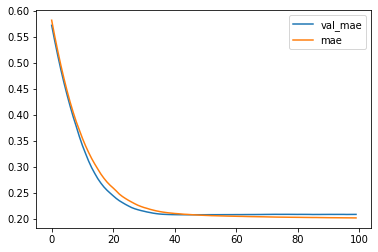

In [706]:
pd.DataFrame(history.history)[["val_mae", "mae"]].plot()

In [707]:
model.summary()

Model: "sequential_94"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_103 (LSTM)             (None, 5)                 140       
                                                                 
 dense_102 (Dense)           (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [708]:
forecast = model.predict(trainX)
#rescale for test
forecast_copies = np.repeat(forecast, df_train_scaled.shape[1], axis = -1)
if all_variables:
    y_pred_future = scaler.inverse_transform(forecast_copies)[:, -3].flatten()
else: 
    y_pred_future = scaler.inverse_transform(forecast_copies)[:].flatten()


#rescale for train
train_scaled_values = np.repeat(trainY, df_train_scaled.shape[1], axis = -1)
if all_variables:   
    train_real_values = scaler.inverse_transform(train_scaled_values)[:, -3].flatten()
else:
    train_real_values = scaler.inverse_transform(train_scaled_values.reshape((train_scaled_values.shape[0],1)))[:].flatten()

15/15 [==============================] - 1s 2ms/step


In [709]:
train_results = pd.DataFrame({"Train Predictions": y_pred_future, "Actuals": train_real_values})

<AxesSubplot:>

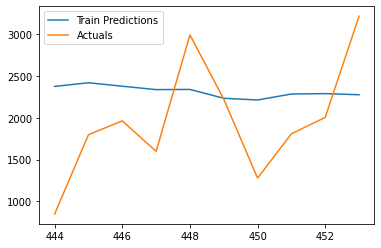

In [711]:
train_results[-10:].plot()

1/1 [==============================] - 1s 1s/step


In [507]:
train_results

,Train Predictions,Actuals
0,0.382528,0.188794
1,0.347280,0.194499
2,0.304072,0.168919
3,0.272113,0.668320
4,0.327571,0.068073
5,0.292275,0.336723
6,0.308057,1.000000
7,0.412936,0.943854
8,0.452786,0.000000
9,0.385162,0.223083


In [460]:
model.predict(trainX[-5:])

1/1 [==============================] - 0s 66ms/step


array([[0.11107432],
       [0.01058027],
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

<AxesSubplot:>

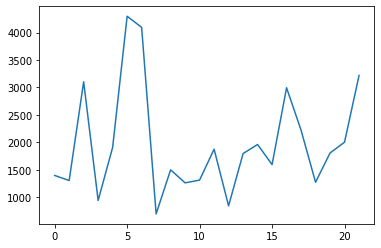

In [156]:
train_results["Actuals"].plot()

<AxesSubplot:>

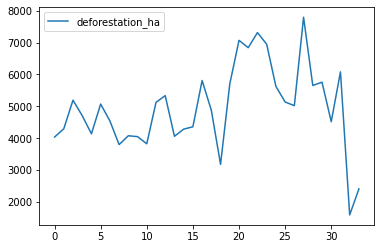

In [161]:
df.query("city.str.contains('Leverg')")[["deforestation_ha"]].reset_index(drop=True).plot()